In [1]:
import pandas as pd #importing a module, dependency. example of abstraction
import numpy as np

import matplotlib.pyplot as plt

C:\Users\wrnaf\AppData\Local\Temp\ipykernel_24432\1617304960.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #importing a module, dependency. example of abstraction


In [3]:
! pip3 install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [12]:
titanic_df = pd.read_csv("titanic_test_data.csv")
titanic_df.head(15)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          902       3                                   Ilieff, Mr. Ylio   
11          903       1                         Jones, Mr. Charles Cresson   
12          904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
13          905       2                               Howard, Mr. Benjamin   
14          906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   

       Sex   Age  SibSp  Parch       Ticket     Fare Cabin Embarked  
0     male  34.5      0      0       330911   7.8292   NaN        Q  
1   female  47.0      1      0       363272   7.0000   NaN        S  
2     male  62.0      0      0       240276   9.6875   NaN        Q  
3     male  27.0      0      0       315154   8.6625   NaN        S  
4   female  22.0      1      1      3101298  12.2875   NaN        S  
5     male  14.0      0      0         7538   9.2250   NaN        S  
6   female  30.0      0      0       330972   7.6292   NaN        Q  
7     male  26.0      1      1       248738  29.0000   NaN        S  
8   female  18.0      0      0         2657   7.2292   NaN        C  
9     male  21.0      2      0    A/4 48871  24.1500   NaN        S  
10    male   NaN      0      0       349220   7.8958   NaN        S  
11    male  46.0      0      0          694  26.0000   NaN        S  
12  female  23.0      1      0        21228  82.2667   B45        S  
13    male  63.0      1      0        24065  26.0000   NaN        S  
14  female  47.0      1      0  W.E.P. 5734  61.1750   E31        S

In [8]:
titanic_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_df.describe()
#the mean of passengers with siblings is .44 meaning most passengers were on the titanic alon or without family

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [11]:
titanic_df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [17]:
titanic_df["embarked_new"]=np.where(titanic_df["Embarked"]=="C", "Cherbourg",
                                   np.where(titanic_df["Embarked"]=="Q","Queensland", "Southhampton"))

In [18]:
titanic_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_new  
0  34.5      0      0   330911   7.8292   NaN        Q    Queensland  
1  47.0      1      0   363272   7.0000   NaN        S  Southhampton  
2  62.0      0      0   240276   9.6875   NaN        Q    Queensland  
3  27.0      0      0   315154   8.6625   NaN        S  Southhampton  
4  22.0      1      1  3101298  12.2875   NaN        S  Southhampton

In [28]:
titanic_df["mr_mrs"] = np.where(titanic_df["Name"].str.contains("Mrs."),"Mrs",
                                np.where(titanic_df["Name"].str.contains("Ms."),"Ms","Mr"))
titanic_df.head()
# it might not be accurate (in fact it isnt) to assume everyone who doesnt
# have Mrs or Ms in their name is a Mr.

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_new mr_mrs  
0  34.5      0      0   330911   7.8292   NaN        Q    Queensland     Mr  
1  47.0      1      0   363272   7.0000   NaN        S  Southhampton    Mrs  
2  62.0      0      0   240276   9.6875   NaN        Q    Queensland     Mr  
3  27.0      0      0   315154   8.6625   NaN        S  Southhampton     Mr  
4  22.0      1      1  3101298  12.2875   NaN        S  Southhampton    Mrs

In [30]:

titanic_df['mr_mrs'].value_counts()

mr_mrs
Mr     345
Mrs     72
Ms       1
Name: count, dtype: int64

In [31]:

titanic_df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

Basic Plots

In [21]:
# (x-axis, y-axis)

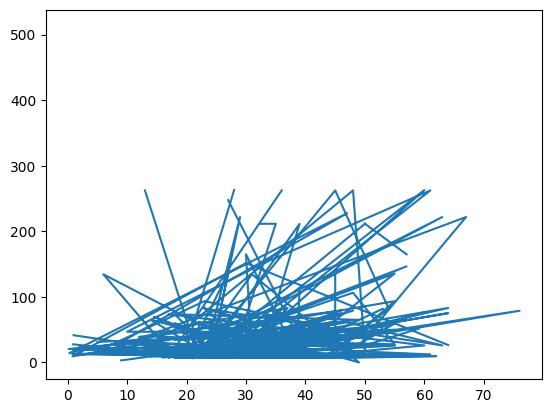

In [32]:
plt.plot(titanic_df['Age'],titanic_df['Fare'])

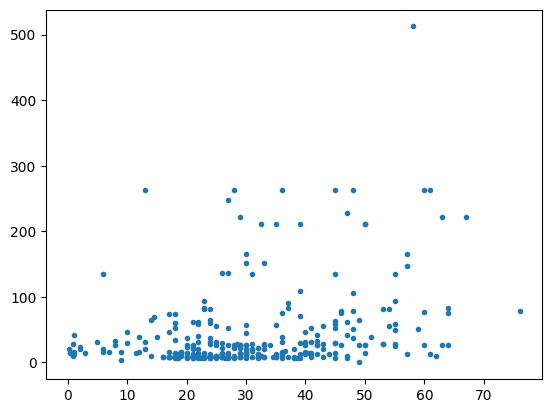

In [33]:
plt.plot(titanic_df['Age'],titanic_df['Fare'],'.')

Histograms

(array([ 46.,   0.,   0.,   0.,   0., 270.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

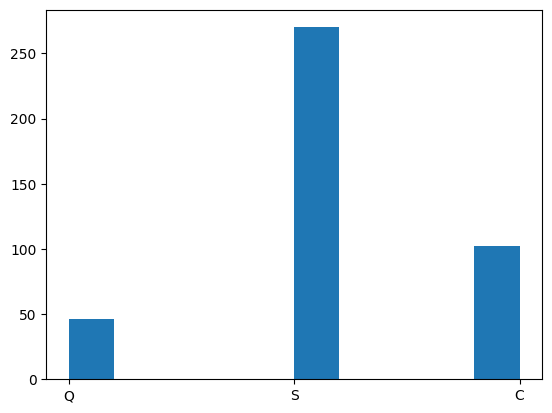

In [35]:
# only plotting one column. Shows you how many of a particular event occurred
plt.hist(titanic_df['Embarked'])

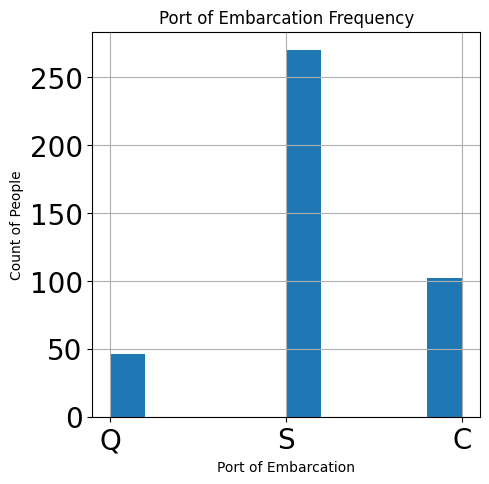

In [36]:
plt.figure(figsize = [5,5])
plt.hist(titanic_df['Embarked'])
plt.xlabel("Port of Embarcation")
plt.ylabel("Count of People")
plt.title("Port of Embarcation Frequency")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.grid()

In [23]:
#pie chart
agg_gender = titanic_df.groupby('Sex').count()
agg_gender

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                         
female          152     152   152  127    152    152     152   152     44   
male            266     266   266  205    266    266     266   265     47   

        Embarked  embarked_new  
Sex                             
female       152           152  
male         266           266

<Axes: ylabel='PassengerId'>

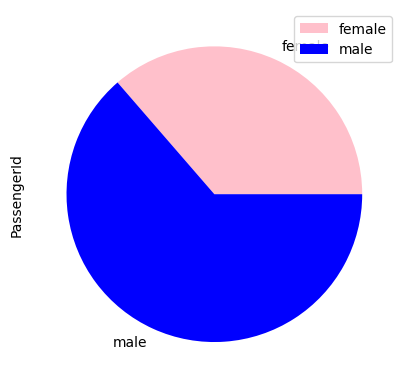

In [25]:
colors = ['pink','blue']
agg_gender.plot(kind='pie', y='PassengerId', colors=colors)